### Deliverable 1: Preprocessing the Data for a Neural Network

In [13]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


### Optimize 1: Drop 'STATUS' , 'ORGANIZATION', 'USE_CASE', 'SPECIAL CONSIDERATIONS ' & 'AFFILIATION columns

In [14]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME','AFFILIATION','USE_CASE','ORGANIZATION','STATUS', 'SPECIAL_CONSIDERATIONS'], axis=1)
application_df

,APPLICATION_TYPE,CLASSIFICATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,C1000,0,5000,1
1,T3,C2000,1-9999,108590,1
2,T5,C3000,0,5000,0
3,T3,C2000,10000-24999,6692,1
4,T3,C1000,100000-499999,142590,1
...,...,...,...,...,...
34294,T4,C1000,0,5000,0
34295,T4,C3000,0,5000,0
34296,T3,C2000,0,5000,0
34297,T5,C3000,0,5000,1


In [15]:
# Determine the number of unique values in each column.
category=application_df.dtypes[application_df.dtypes=='object'].index.tolist()
application_df[category].nunique()


APPLICATION_TYPE    17
CLASSIFICATION      71
INCOME_AMT           9
dtype: int64

In [16]:
# Look at APPLICATION_TYPE value counts for binning
Application_counts = application_df.APPLICATION_TYPE.value_counts()
Application_counts


T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

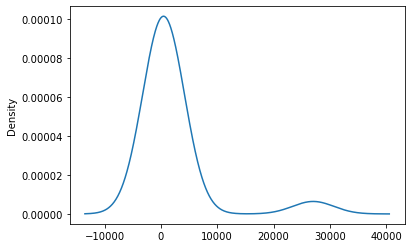

In [17]:
Application_counts.plot.density()

In [18]:
# Determine which values to replace
replace_application = list(Application_counts[Application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [19]:
# Look at CLASSIFICATION value counts for binning
Classification_counts = application_df.CLASSIFICATION.value_counts()
Classification_counts.head(40)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C6000       15
C1800       15
C1250       14
C8200       11
C1278       10
C1238       10
C1237        9
C1235        9
C7210        7
C1720        6
C2400        6
C4100        6
C1257        5
C1600        5
C0           3
C2710        3
C1260        3
Name: CLASSIFICATION, dtype: int64

<AxesSubplot:ylabel='Density'>

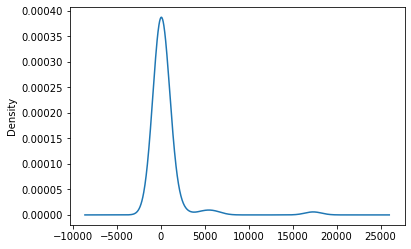

In [20]:
# Visualize the value counts of CLASSIFICATION
Classification_counts.plot.density()

In [21]:
# Determine which values to replace
replace_class = list(Classification_counts[Classification_counts < 780].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [22]:
# Generate our categorical variable lists
application_cat=application_df.dtypes[application_df.dtypes=='object'].index.tolist()
application_df[application_cat].nunique()

APPLICATION_TYPE    9
CLASSIFICATION      6
INCOME_AMT          9
dtype: int64

In [23]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,CLASSIFICATION_C1000,...,CLASSIFICATION_Other,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Merge one-hot encoded features and drop the originals

application_df = application_df.merge(encode_df,left_index=True,right_index=True).drop(application_cat,1)
application_df.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,CLASSIFICATION_Other,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# Split our preprocessed data into our features and target arrays
y=application_df['IS_SUCCESSFUL'].values
X= application_df.drop(['IS_SUCCESSFUL'],1).values


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
len(X_train[0])

25

In [26]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
len(X_train_scaled[0])

25

### Deliverable 2: Compile, Train and Evaluate the Model


#### Question to be asked: Is the money being used effectively?


In [27]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features=len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)


#Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 4,541
Trainable params: 4,541
Non-trainable params: 0
_________________________________________________________________


#### Add a checkpoint:

In [28]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_OPT1/",exist_ok=True)
checkpoint_path = "checkpoints_OPT1/weights.{epoch:02d}.hdf5"

In [29]:
#Create a callback object(defines a set of functions that will be applied at a spec. stages of the training process)
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period= 5
)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
804/804 [==============================] - 1s 592us/step - loss: 0.6453 - accuracy: 0.6155
Epoch 2/100
804/804 [==============================] - 0s 599us/step - loss: 0.6405 - accuracy: 0.6222
Epoch 3/100
804/804 [==============================] - 0s 587us/step - loss: 0.6397 - accuracy: 0.6197
Epoch 4/100
804/804 [==============================] - 1s 723us/step - loss: 0.6394 - accuracy: 0.6223
Epoch 5/100
804/804 [==============================] - 1s 816us/step - loss: 0.6388 - accuracy: 0.6238

Epoch 00005: saving model to checkpoints_OPT1\weights.05.hdf5
Epoch 6/100
804/804 [==============================] - 1s 650us/step - loss: 0.6383 - accuracy: 0.6220
Epoch 7/100
804/804 [==============================] - 1s 677us/step - loss: 0.6380 - accuracy: 0.6203
Epoch 8/100
804/804 [==============================] - 1s 795us/step - loss: 0.6376 - accuracy: 0.6222
Epoch 9/100
804/804 [==============================] - 1s 683us/step - loss: 0.6376 - accuracy: 0.6228
Epoch 10/1

In [30]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6329 - accuracy: 0.6318
Loss: 0.6328691244125366, Accuracy: 0.6318367123603821


In [31]:
# Save and export your results to an HDF5 file

nn.save("AlphabetSoupCharity_OPT1.h5")

## This part is for visualization purposes and it's not part of the deliverables

In [32]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))


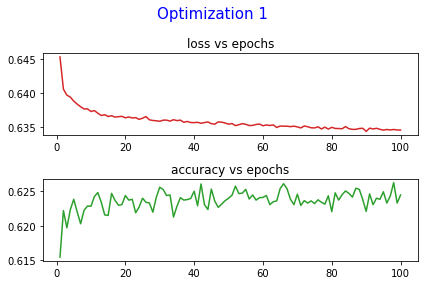

In [43]:
#create a new df, and create an index column for subplots              
history_df['epochs'] = history_df.index
history_df

# Create a plot to see the two graphs
import matplotlib.pyplot as plt
fig,axs= plt.subplots(2)
fig.suptitle('Optimization 1', size=15, color='blue')
axs[0].plot(history_df['epochs'], history_df['loss'], 'tab:red')
axs[1].plot(history_df['epochs'], history_df['accuracy'], 'tab:green')
axs[0].set_title('loss vs epochs')
axs[1].set_title('accuracy vs epochs')
fig.tight_layout()




